# Student Performance Predictor



## Introduction

The academic performance of students in competitive exams is a topic of great interest to educational researchers, policymakers, and educational institutions. This project aims to analyze a comprehensive dataset containing information of candidates' performance in an entrace examination, along with various demographic and academic indicators.

The dataset is especially for investigating the factors that influence success in competitive exams and understanding how characteristics such as educational background, participation in coaching classes, and parents' occupations can impact the results.

Furthermore, this project seeks to explore the potential of predictive models that can forecast candidates' performance based on demographic and academic data, providing relevant insights for more effective educational interventions and public policies.

In this way, this study can provide important contributions to the development of strategies aimed at improving student performance and promoting equity in access to educational opportunities.

**Aspects to Explore:**

* Performance Analysis: Identify how performance in the entrance exam is influenced by different factors, such as educational background and participation in coaching classes.

* Predictive Modeling: Develop models to predict exam outcomes based on demographic and academic data.

* Socioeconomic Analysis: Investigate the influence of candidates' socioeconomic context, considering parents' occupations and demographic background.

* Performane Comparison: Evaluate performance differences between groups, such as candidates who attended coaching classes versus thos who did not.

* Educational Recommendations: Propose strategies and interventions that could improve candidates' performance in competitive exams.

**Tools Used:**

* Python: For data analysis and development of predictive models, using libraries sucha as Pandas, Numpy, Scikit-Learn, and Matplotlib.

* Power BI:For data visualization and creation of interactive reports.

* Jupyter Notebook/Google Colab: For executing code and presenting results in an organized manner.

**Data Source:** The data was obtained form the [Student Performance on an Entrance Examination](https://www.kaggle.com/datasets/adilshamim8/student-performance-on-an-entrance-examination/data).

# Library Import and Dataset Loading

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv('Student_Performance_on_an_Entrance_Examination.csv')

# Exploratory Data Analysis (EDA)

In [6]:
# First rows of dataframe
df.head()

,Gender,Caste,coaching,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,time,Performance
0,male,General,NO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS,ONE,Excellent
1,male,OBC,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE,TWO,Excellent
2,male,OBC,OA,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE,TWO,Excellent
3,male,General,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER,ONE,Excellent
4,male,General,OA,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE,TWO,Excellent


In [7]:
# Dataset Shape
print(f'Our dataset is composed by {df.shape[1]} columns e {df.shape[0]} rows.')

Our dataset is composed by 12 columns e 666 rows.


In [8]:
# Dataframe info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                666 non-null    object
 1   Caste                 666 non-null    object
 2   coaching              666 non-null    object
 3   Class_ten_education   666 non-null    object
 4   twelve_education      666 non-null    object
 5   medium                666 non-null    object
 6   Class_X_Percentage    666 non-null    object
 7   Class_XII_Percentage  666 non-null    object
 8   Father_occupation     666 non-null    object
 9   Mother_occupation     666 non-null    object
 10  time                  666 non-null    object
 11  Performance           666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB


In [9]:
# Summary Statistics of Numeric Columns
df.describe(include='all')

,Gender,Caste,coaching,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,time,Performance
count,666,666,666,666,666,666,666,666,666,666,666,666
unique,2,4,3,3,3,3,4,4,8,9,6,4
top,male,General,WA,SEBA,AHSEC,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE,TWO,Good
freq,355,329,449,396,368,536,511,398,277,442,368,210


In [10]:
# Contagem de valores nulos
df.isnull().sum()

Gender                  0
Caste                   0
coaching                0
Class_ten_education     0
twelve_education        0
medium                  0
Class_X_Percentage      0
Class_XII_Percentage    0
Father_occupation       0
Mother_occupation       0
time                    0
Performance             0
dtype: int64

No missing data.

In [11]:
# Checking Duplicated Values
df.duplicated().sum()

44

We have 44 duplicate records.

In [12]:
# Drop Duplicated Values
df.drop_duplicates(inplace=True)

In [13]:
# Columns
df.columns

Index(['Gender', 'Caste', 'coaching', 'Class_ten_education',
       'twelve_education', 'medium', 'Class_X_Percentage',
       'Class_XII_Percentage', 'Father_occupation', 'Mother_occupation',
       'time', 'Performance'],
      dtype='object')

In [14]:
# Verification of Unique Values in Columns
for i in df.columns:
  print(i, ':', df[i].unique())

Gender : ['male' 'female']
Caste : ['General' 'OBC' 'SC' 'ST']
coaching : ['NO' 'WA' 'OA']
Class_ten_education : ['SEBA' 'OTHERS' 'CBSE']
twelve_education : ['AHSEC' 'CBSE' 'OTHERS']
medium : ['ENGLISH' 'OTHERS' 'ASSAMESE']
Class_X_Percentage : ['Excellent' 'Vg' 'Good' 'Average']
Class_XII_Percentage : ['Excellent' 'Vg' 'Good' 'Average']
Father_occupation : ['DOCTOR' 'SCHOOL_TEACHER' 'BUSINESS' 'COLLEGE_TEACHER' 'OTHERS'
 'BANK_OFFICIAL' 'ENGINEER' 'CULTIVATOR']
Mother_occupation : ['OTHERS' 'HOUSE_WIFE' 'SCHOOL_TEACHER' 'DOCTOR' 'COLLEGE_TEACHER'
 'BANK_OFFICIAL' 'BUSINESS' 'CULTIVATOR' 'ENGINEER']
time : ['ONE' 'TWO' 'THREE' 'FOUR' 'FIVE' 'SEVEN']
Performance : ['Excellent' 'Vg' 'Good' 'Average']


**Description of the Categories in the Columns:**

* Caste: Represents the castes.

  * General: Refers to individuals who do not belong to any reserved category.

  * OBC (Other Backward Classes): Social groups considered economically and socially disadvantaged.

  * SC (Scheduled Castes): Includes castes that have historically been discriminated against and socially marginalized, also called Dalits.

  * ST (Scheduled Tribes): Refers to indigenous and tribal groups living in remote areas who face social and economic challenges.

* Coaching: Categorical information indicating whether the candidate attended coaching classes before the exam and where those classes were held.

  * NO (No Coaching): Candidates who did not attend coaching.

  * WA (Within Assam): Candidates who attended coaching within the state of Assam.

  * OA (Outside Assam): Candidates who attended coaching outside the state of Assam.

* Class_ten_education: Indicates the institution or educational board where the candidate completed their secondary education (Class X).

  * SEBA (Board of Secondary Education, Assam): The specific state board of Assam.

  * CBSE (Central Board of Secondary Education): The national Indian board, considered more rigorous and standardized.

* Twelve_education: Indicates the educational board or institution where the candidate completed their higher secondary education (Class XII).

  * AHSEC (Assam Higher Secondary Education Council): The state board that regulates higher secondary education in Assam.

  * CBSE (Central Board of Secondary Education): The national board with a more standardized curriculum focused on competitive exams and higher education.

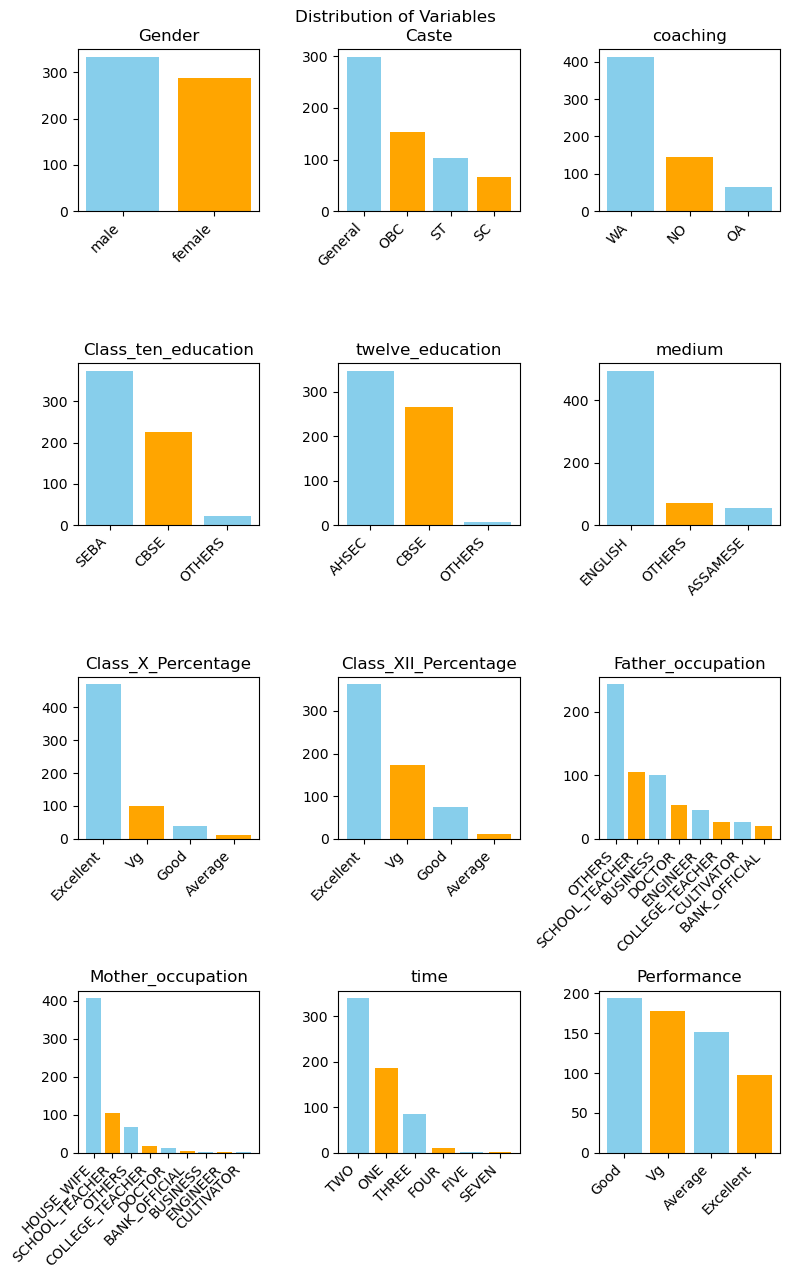

In [15]:
# Class Balance Check
column = df.columns

fig, axs = plt.subplots(4, 3, figsize=(8,13))
fig.suptitle('Distribution of Variables', fontsize=12)

for i, column in enumerate(column):
  ax = axs[i // 3, i % 3]
  contagem = df[column].value_counts()

  ax.bar(contagem.index, contagem.values, color=['skyblue', 'orange'])
  ax.set_title(column)
  ax.set_xticks(range(len(contagem.index)))
  ax.set_xticklabels(contagem.index, rotation=45, ha='right')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [16]:
# Gender
df.groupby(['Gender']).size()

Gender
female    288
male      334
dtype: int64

In [17]:
# Caste
df.groupby(['Caste']).size()

Caste
General    299
OBC        154
SC          66
ST         103
dtype: int64

In [18]:
# Coaching
df.groupby(['coaching']).size()

coaching
NO    144
OA     65
WA    413
dtype: int64

In [19]:
# Class ten education
df.groupby(['Class_ten_education']).size()

Class_ten_education
CBSE      226
OTHERS     21
SEBA      375
dtype: int64

In [20]:
# Twelve education
df.groupby(['twelve_education']).size()

twelve_education
AHSEC     348
CBSE      266
OTHERS      8
dtype: int64

In [21]:
# Medium
df.groupby(['medium']).size()

medium
ASSAMESE     56
ENGLISH     495
OTHERS       71
dtype: int64

In [22]:
# Class X Percentage
df.groupby(['Class_X_Percentage']).size()

Class_X_Percentage
Average       13
Excellent    469
Good          40
Vg           100
dtype: int64

In [23]:
# Class XII Percentage
df.groupby(['Class_XII_Percentage']).size()

Class_XII_Percentage
Average       12
Excellent    362
Good          74
Vg           174
dtype: int64

In [24]:
# Father occupation
df.groupby(['Father_occupation']).size()

Father_occupation
BANK_OFFICIAL       21
BUSINESS           101
COLLEGE_TEACHER     27
CULTIVATOR          26
DOCTOR              54
ENGINEER            45
OTHERS             243
SCHOOL_TEACHER     105
dtype: int64

In [25]:
# Mother occupation
df.groupby(['Mother_occupation']).size()

Mother_occupation
BANK_OFFICIAL        4
BUSINESS             3
COLLEGE_TEACHER     19
CULTIVATOR           1
DOCTOR              13
ENGINEER             3
HOUSE_WIFE         407
OTHERS              68
SCHOOL_TEACHER     104
dtype: int64

In [26]:
# Time
df.groupby(['time']).size()

time
FIVE       1
FOUR      11
ONE      185
SEVEN      1
THREE     85
TWO      339
dtype: int64

In [27]:
# Performance
df.groupby(['Performance']).size()

Performance
Average      152
Excellent     98
Good         194
Vg           178
dtype: int64

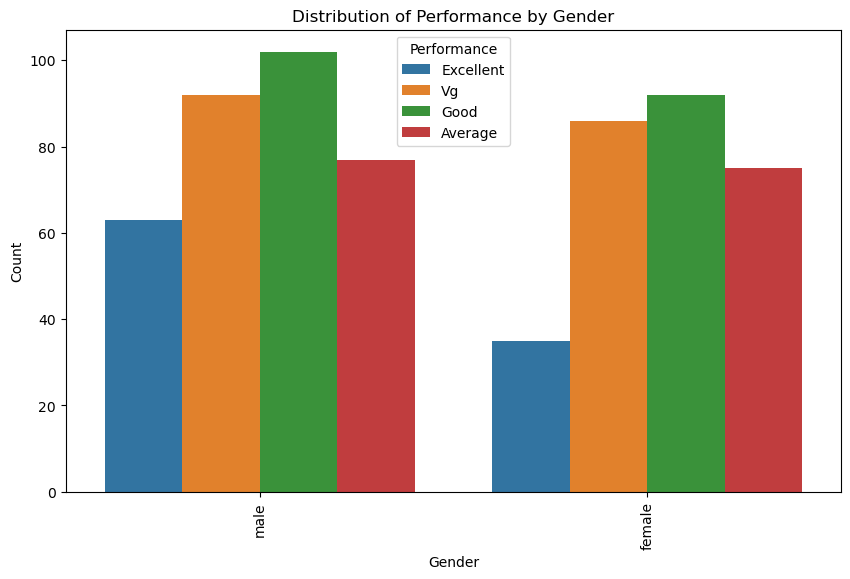

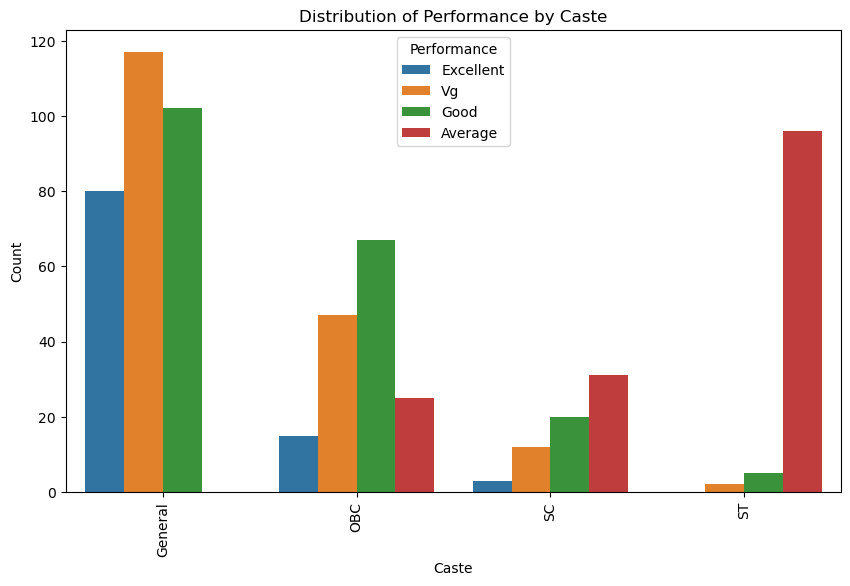

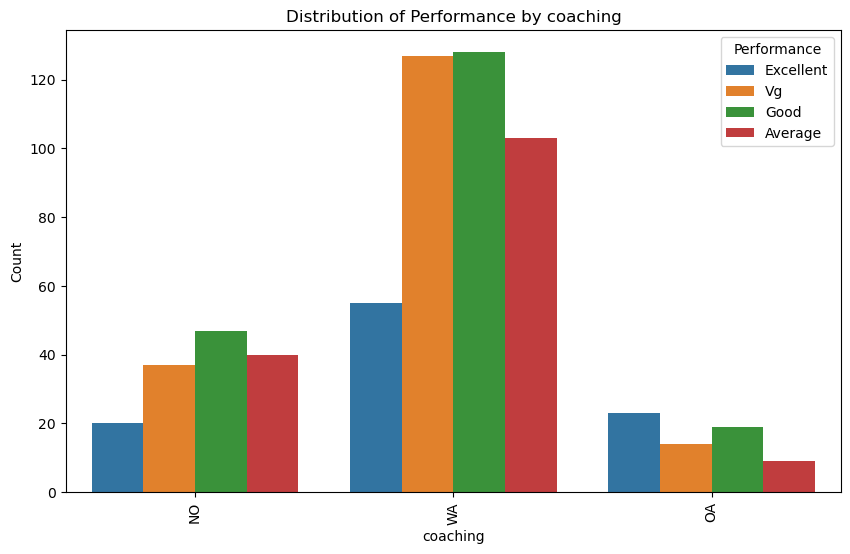

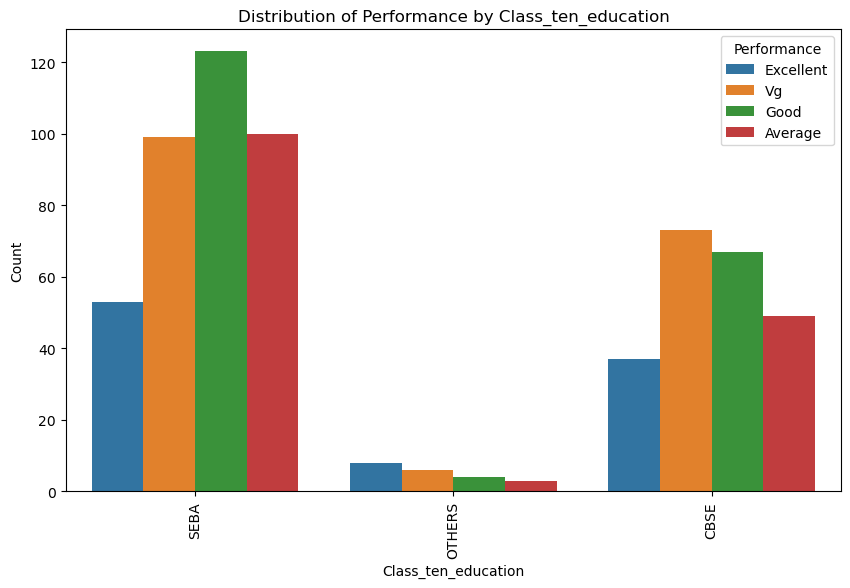

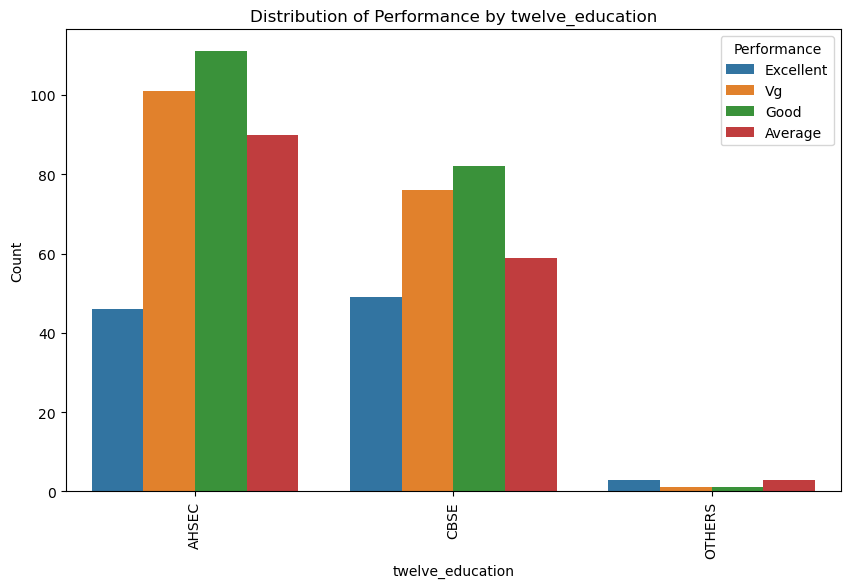

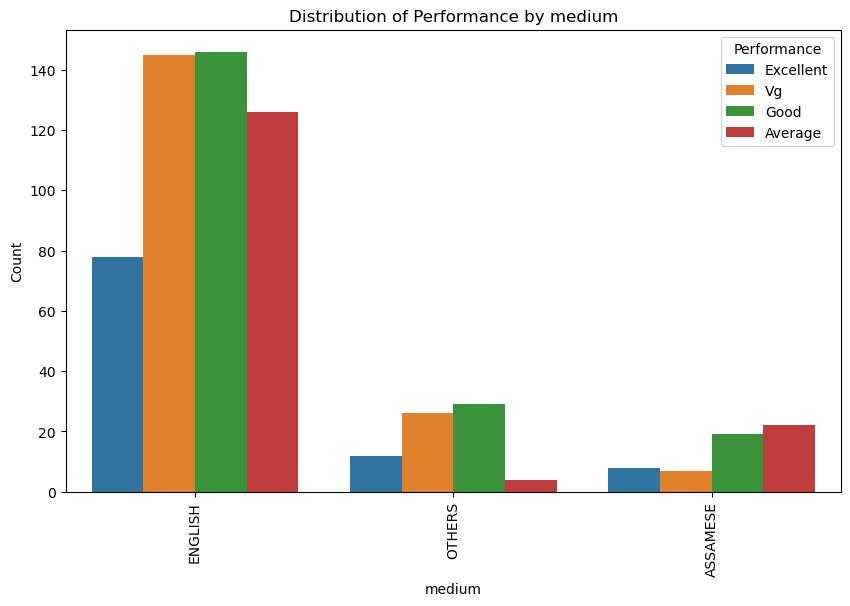

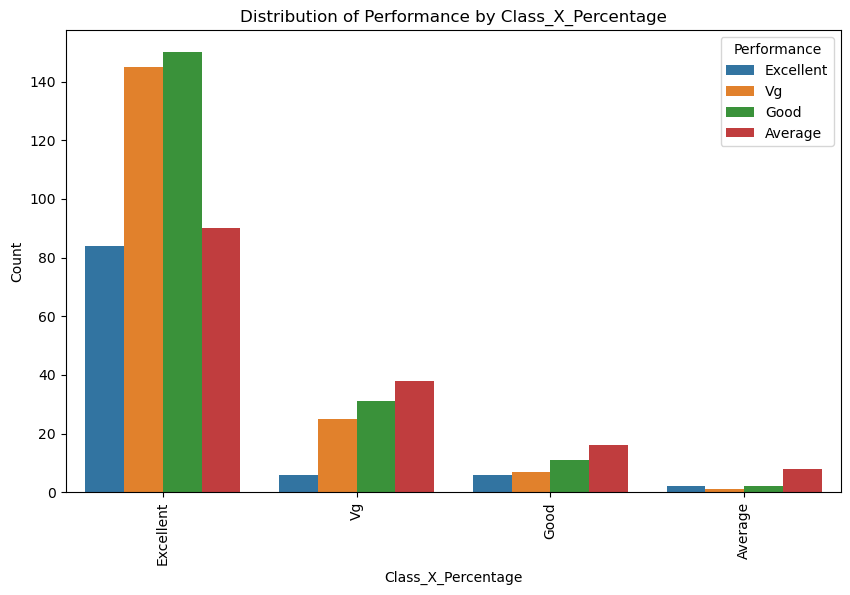

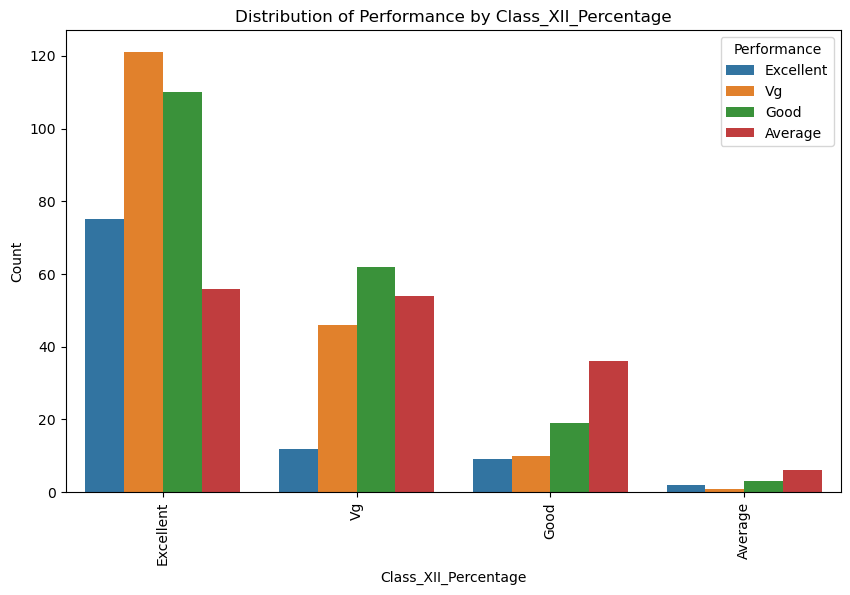

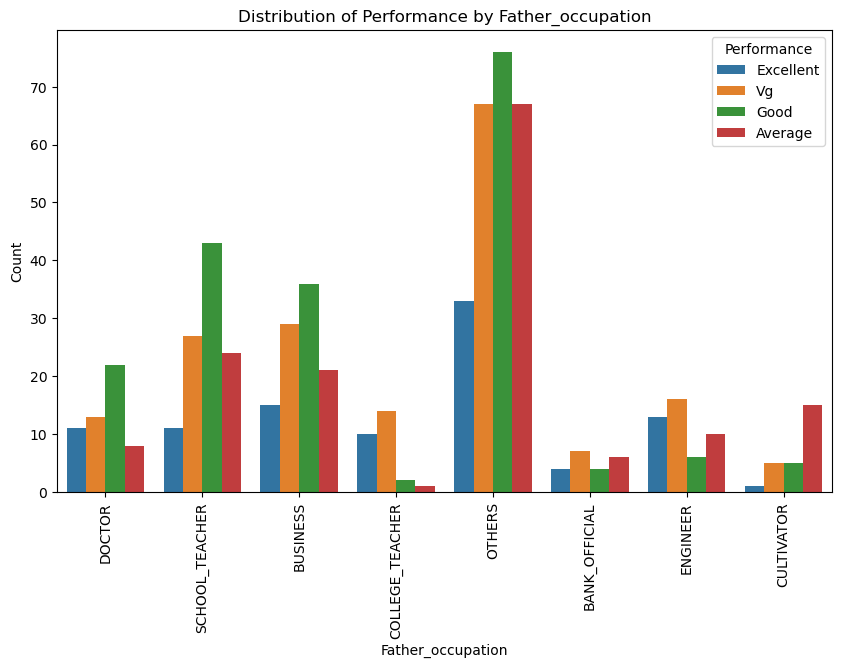

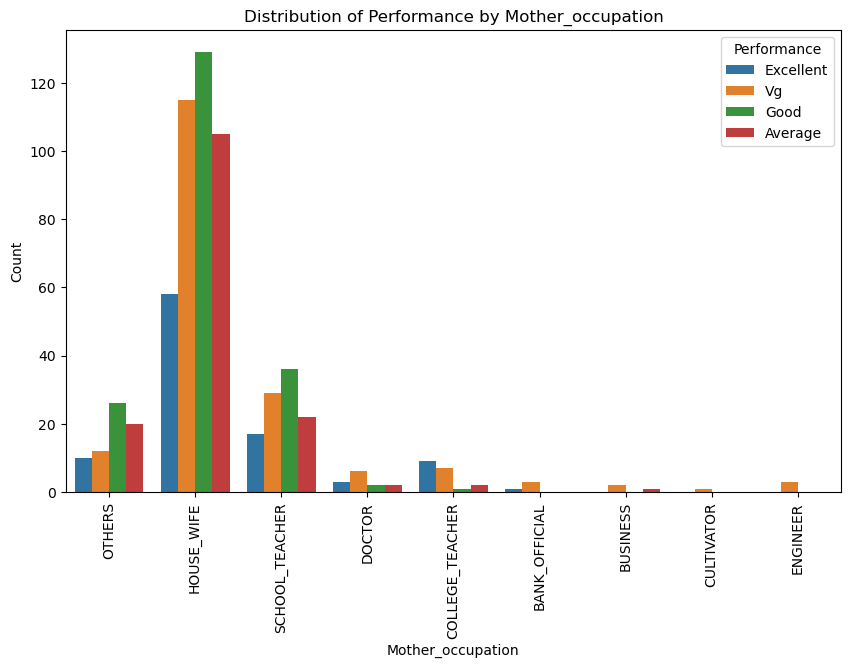

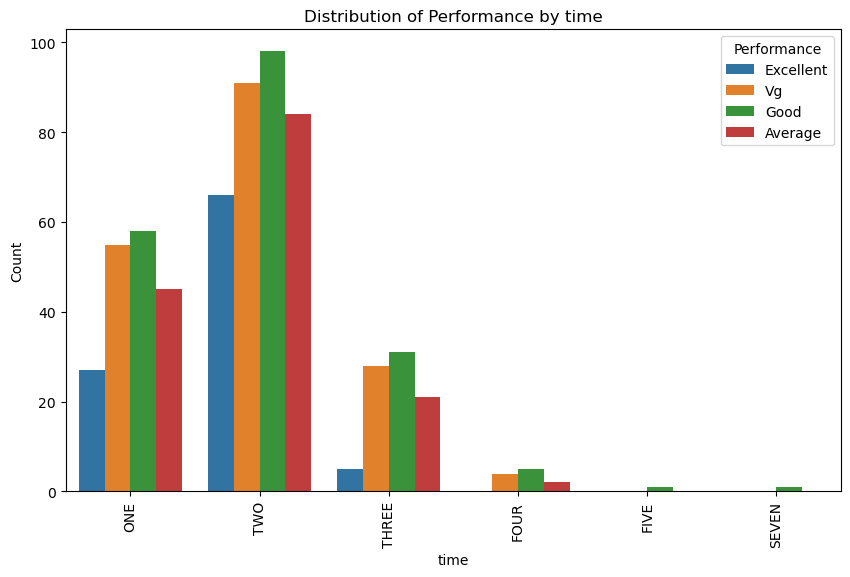

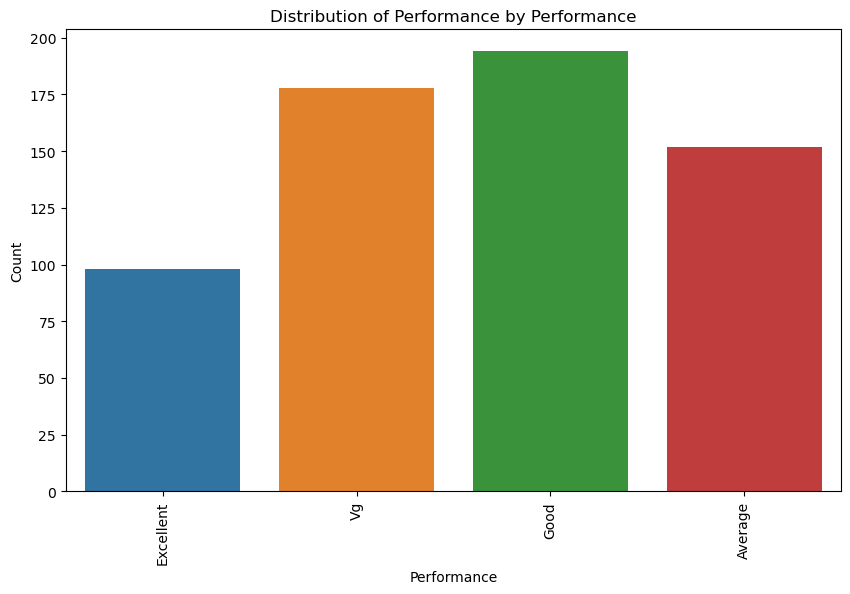

In [28]:
# List of Columns to Analyse Against 'Performance'

analysed_columns = df.columns

for col in analysed_columns:
  plt.figure(figsize=(10,6))
  sns.countplot(x=col, hue='Performance', data=df)
  plt.title(f'Distribution of Performance by {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.show()

In [29]:
# Function to Identify Rare Categories in All Categorical Columns
def identify_rar_categories(df, threshold=0.05):
    rare_categories = {}
    total_linhas = len(df)

    for column in df.select_dtypes(include=['object']).columns:
        # Counts the Occurences of Each Category
        frequencias = df[column].value_counts(normalize=True)

        # Filters categories with a frequency lower than the threshold (5% by default)
        rare = frequencias[frequencias < threshold].index.tolist()

        if rare:  # Adds only if there are rare categories in the column
            rare_categories[column] = rare

    return rare_categories

# Applying the function
rare_categories = identify_rar_categories(df, threshold=0.05)

# Displaying the rare categories found
for column, rare in rare_categories.items():
    print(f"\nColumn: {column}")
    print(f"Rare Categories ({len(rare)}): {rare}")


Column: Class_ten_education
Rare Categories (1): ['OTHERS']

Column: twelve_education
Rare Categories (1): ['OTHERS']

Column: Class_X_Percentage
Rare Categories (1): ['Average']

Column: Class_XII_Percentage
Rare Categories (1): ['Average']

Column: Father_occupation
Rare Categories (3): ['COLLEGE_TEACHER', 'CULTIVATOR', 'BANK_OFFICIAL']

Column: Mother_occupation
Rare Categories (6): ['COLLEGE_TEACHER', 'DOCTOR', 'BANK_OFFICIAL', 'BUSINESS', 'ENGINEER', 'CULTIVATOR']

Column: time
Rare Categories (3): ['FOUR', 'FIVE', 'SEVEN']


# Data Cleaning and Preprocessing

In [30]:
# Rename columns

df.rename(columns={'coaching': 'Coaching', 'twelve_education': 'Twelve Education', 'medium': 'Medium', 'time':'Time'}, inplace=True)

In [31]:
# Removing low frequency categories
remove_rare_categories = {'Class_ten_education': ['OTHERS'],
                            'Twelve Education': ['OTHERS']}

for column, categories in remove_rare_categories.items():
  df = df[~df[column].isin(categories)]

In [32]:
# Consolidation of low-frequency categories into a single category
for columns, rare_values in rare_categories.items():
  df[column] = df[column].replace(rare_values, 'OTHER')

# Feature Engineering

https://www.kaggle.com/code/mahmoudredagamail/student-performance-on-an-entrance-examination/notebook

In [33]:
df.head()

,Gender,Caste,Coaching,Class_ten_education,Twelve Education,Medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation,Time,Performance
0,male,General,NO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS,ONE,Excellent
1,male,OBC,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE,TWO,Excellent
3,male,General,WA,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER,ONE,Excellent
4,male,General,OA,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE,TWO,Excellent
5,male,General,WA,CBSE,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE,TWO,Excellent


In [34]:
# Encoding variables in order

lb = LabelEncoder()

variabels_for_lb = ['Class_X_Percentage', 'Class_XII_Percentage', 'Time', 'Performance']

for col in variabels_for_lb:
  df[col] = lb.fit_transform(df[col])

In [35]:
# One-Hot Encoding

variables_onehot = ['Gender', 'Caste', 'Coaching', 'Class_ten_education', 'Twelve Education', 'Medium', 'Father_occupation', 'Mother_occupation']

df = pd.get_dummies(df, columns=variables_onehot, drop_first=True).astype(int)

In [36]:
df.head()

,Class_X_Percentage,Class_XII_Percentage,Time,Performance,Gender_male,Caste_OBC,Caste_SC,Caste_ST,Coaching_OA,Coaching_WA,...,Father_occupation_OTHERS,Father_occupation_SCHOOL_TEACHER,Mother_occupation_BUSINESS,Mother_occupation_COLLEGE_TEACHER,Mother_occupation_CULTIVATOR,Mother_occupation_DOCTOR,Mother_occupation_ENGINEER,Mother_occupation_HOUSE_WIFE,Mother_occupation_OTHERS,Mother_occupation_SCHOOL_TEACHER
0,1,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,5,1,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,1,1,2,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,1,1,5,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,1,1,5,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 665
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Class_X_Percentage                 600 non-null    int32
 1   Class_XII_Percentage               600 non-null    int32
 2   Time                               600 non-null    int32
 3   Performance                        600 non-null    int32
 4   Gender_male                        600 non-null    int32
 5   Caste_OBC                          600 non-null    int32
 6   Caste_SC                           600 non-null    int32
 7   Caste_ST                           600 non-null    int32
 8   Coaching_OA                        600 non-null    int32
 9   Coaching_WA                        600 non-null    int32
 10  Class_ten_education_SEBA           600 non-null    int32
 11  Twelve Education_CBSE              600 non-null    int32
 12  Medium_ENGLISH             

In [38]:
# Separation of Feature and Target
x = df.drop(columns=['Performance'])
y = df['Performance']

In [39]:
# Splitting the Data into Training and Testing Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modeling Pipeline

In [40]:
# Generate function for calculating performance metrics
def calculate_performance(y_test, y_pred):
    class_report = classification_report(y_test, y_pred)
    print('Performance Report:\n', class_report)
    return class_report

In [41]:
# Models to be evaluated
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_samples=.9, max_depth=3, min_samples_split=5, min_samples_leaf=2, class_weight='balanced'),
    'SVC': SVC(kernel='rbf', gamma=0.1, C=1.0, random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, algorithm='auto')
}


Model Performance: Decision Tree
Performance Report:
               precision    recall  f1-score   support

           0       0.68      0.89      0.77        28
           1       0.33      0.32      0.33        22
           2       0.28      0.25      0.26        36
           3       0.30      0.26      0.28        34

    accuracy                           0.42       120
   macro avg       0.40      0.43      0.41       120
weighted avg       0.39      0.42      0.40       120

Accuracy: 0.417


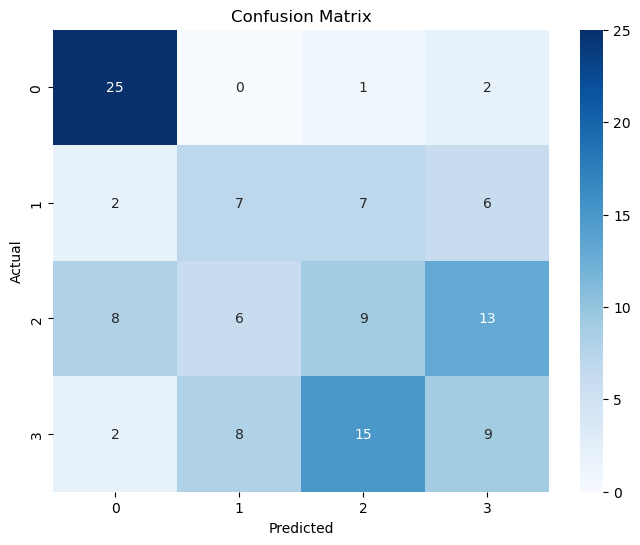


Model Performance: Random Forest
Performance Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.33      0.55      0.41        22
           2       0.46      0.36      0.41        36
           3       0.37      0.29      0.33        34

    accuracy                           0.50       120
   macro avg       0.51      0.52      0.51       120
weighted avg       0.51      0.50      0.50       120

Accuracy: 0.5


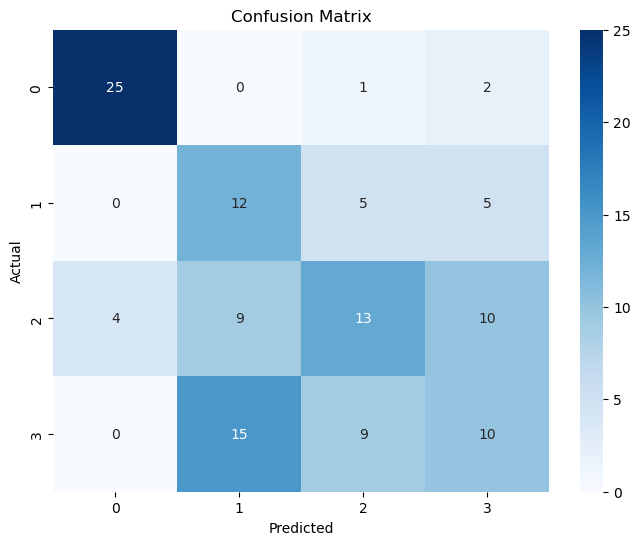


Model Performance: SVC
Performance Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.67      0.09      0.16        22
           2       0.40      0.58      0.48        36
           3       0.42      0.44      0.43        34

    accuracy                           0.53       120
   macro avg       0.59      0.50      0.49       120
weighted avg       0.56      0.53      0.50       120

Accuracy: 0.525


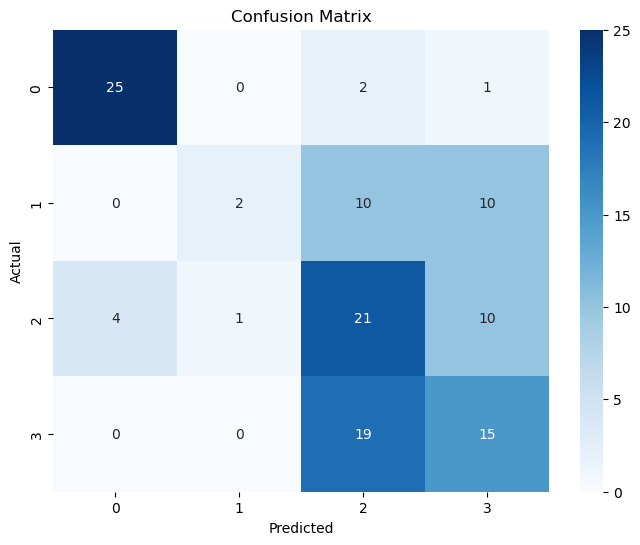


Model Performance: KNeighborsClassifier
Performance Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70        28
           1       0.36      0.23      0.28        22
           2       0.33      0.42      0.37        36
           3       0.32      0.29      0.31        34

    accuracy                           0.42       120
   macro avg       0.42      0.41      0.41       120
weighted avg       0.42      0.42      0.41       120

Accuracy: 0.417


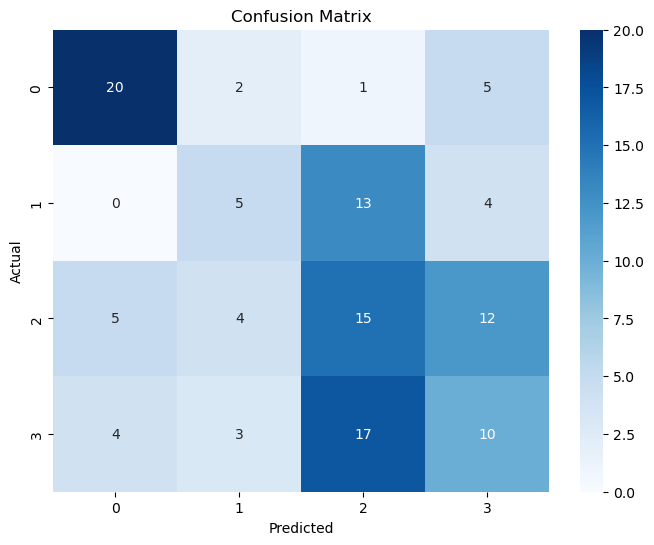

In [42]:
# Model Training
results = {}
y_pred_all = {}

for name, model in models.items():
    model.fit(x_train, y_train)

    # Making predictions
    y_pred = model.predict(x_test)

    # Saving predictions for visual comparison
    y_pred_all[name] = y_pred

    # Calculating Performance Metrics
    print(f'\nModel Performance: {name}')
    results[name] = calculate_performance(y_test, y_pred)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {round(accuracy,3)}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Hyperparameter Tuning

In [43]:
# SVC Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.5166666666666667
Test Accuracy: 0.5083333333333333


In [44]:
# Random Forest Grid Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

best_model_rf = grid_search_rf.best_estimator_

# Avaliar o modelo no conjunto de teste
test_accuracy_rf = best_model_rf.score(x_test, y_test)
print("Test Accuracy for Random Forest:", test_accuracy_rf)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for Random Forest: 0.5125
Test Accuracy for Random Forest: 0.49166666666666664


# Model Evaluation

Performance Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        28
           1       0.25      0.09      0.13        22
           2       0.40      0.53      0.46        36
           3       0.41      0.41      0.41        34

    accuracy                           0.51       120
   macro avg       0.48      0.49      0.47       120
weighted avg       0.48      0.51      0.48       120



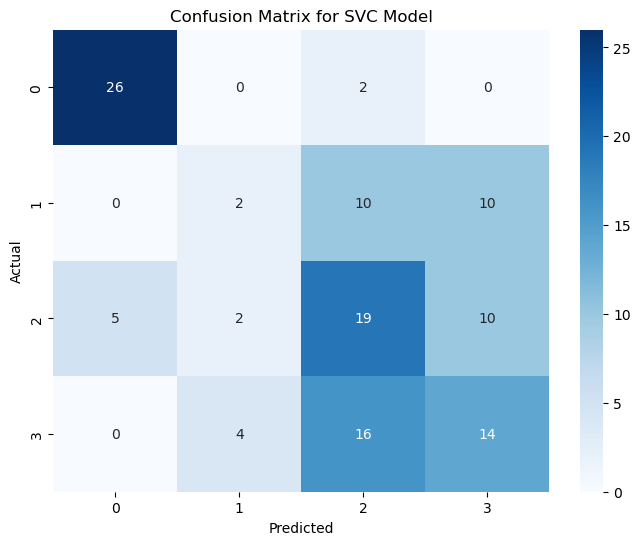

In [45]:
# Model Evaluation using SVC (best hiperparameter)

model_SVC = SVC(kernel='linear', gamma='scale', C= 1, random_state=42)
model_SVC.fit(x_train, y_train)
prediction_SVC = model_SVC.predict(x_test)
report_SVC = calculate_performance(y_test, prediction_SVC)

cm = confusion_matrix(y_test, prediction_SVC)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC Model')
plt.show()

# Conclusion

The model, specifically the SVC with a linear kernel, shows a strong performance for class 0, with high precision (0.84) and recall (0.93), resulting in a F1-score of 0.88. However, ther performance for class 1 is very poor, with precision (0.25) and recall (0.09) significantly low, leading to a very low F1-score of 0.13. Class 2 and 3 show moderate performance, but still have room for improvement. The overall accuracy is 51%, wich indicates that the model is performing suboptimally, especially considering the class imbalance.

# Next Step

Since SVC showed moderate results and class imbalance was an issue, applying techniques such as SMOTE or adjusting class_weight='balanced' could improve predictions for underrepresented classes. Additionally, analyzing feature importance in tree-based models (Decision Tree and Random Forest) could help optimize the dataset by removing irrelevant features or engineering new ones.

Exploring more advanced models like XGBoost or Gradient Boosting may also be beneficial to enhance accuracy and generalization. Additionally, applying cross-validation will help ensure model stability and prevent overfitting to a specific train-test split.

If the results are still not satisfactory, revisiting data preprocessing—especially normalization or standardization—could further improve performance, particularly for SVC and KNN, which are sensitive to feature scaling.